In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime
%matplotlib inline

In [61]:
!pip install yfinance

  Using cached beautifulsoup4-4.11.1-py3-none-any.whl (128 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.3
    Uninstalling lxml-4.6.3:
      Successfully uninstalled lxml-4.6.3
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


In [63]:
import yfinance as yf

In [66]:
start = '2010-01-01'
end = '2021-12-31'

df = yf.download('AAPL',start,end)

[*********************100%***********************]  1 of 1 completed


In [67]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515212,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526477,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [68]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,175.850006,176.850006,175.270004,176.279999,175.262802,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.289459,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,178.255432,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,178.344940,62348900
2021-12-30,179.470001,180.570007,178.089996,178.199997,177.171722,59773000


In [69]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515212,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526477,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [70]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


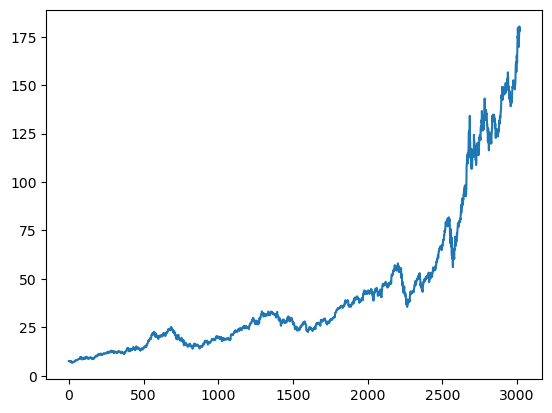

In [71]:
plt.plot(df.Close)

In [72]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3015    153.0106
3016    153.3444
3017    153.6667
3018    153.9991
3019    154.3202
Name: Close, Length: 3020, dtype: float64

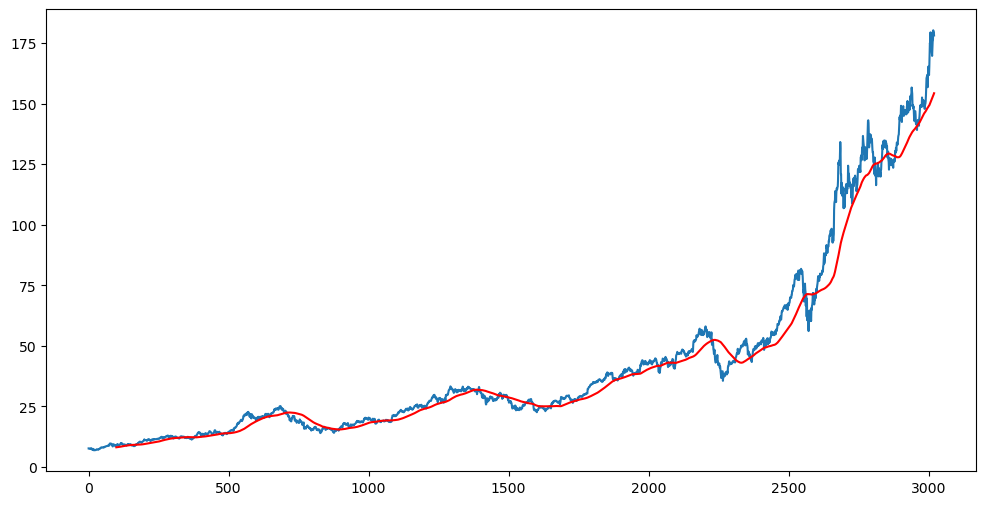

In [75]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [78]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3015    142.55920
3016    142.85570
3017    143.13220
3018    143.40125
3019    143.66845
Name: Close, Length: 3020, dtype: float64

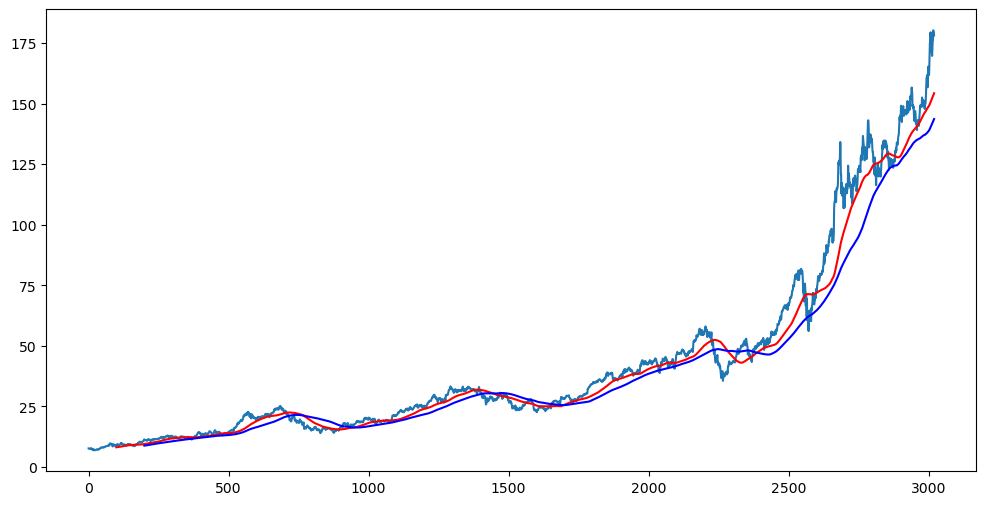

In [79]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'b')

In [90]:
# Train test split


data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
                            
print(data_training.shape)
print(data_testing.shape)

(2114, 1)
(906, 1)


In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [93]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0192931 ],
       [0.01961817],
       [0.01662229],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [96]:
x_train = []
y_train = []


for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)

In [102]:
x_train.shape

(2014, 100, 1)

In [98]:
!pip install keras

In [100]:
!pip install tensorflow

In [101]:
# ml-model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [103]:
model = Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))



model.add(Dense(units=1))

In [104]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [105]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
63/63 [==============================] - 42s 490ms/step - loss: 0.0358
Epoch 2/50
63/63 [==============================] - 31s 490ms/step - loss: 0.0083
Epoch 3/50
63/63 [==============================] - 30s 479ms/step - loss: 0.0072
Epoch 4/50
63/63 [==============================] - 31s 499ms/step - loss: 0.0068
Epoch 5/50
63/63 [==============================] - 30s 480ms/step - loss: 0.0069
Epoch 6/50
63/63 [==============================] - 32s 502ms/step - loss: 0.0061
Epoch 7/50
63/63 [==============================] - 32s 508ms/step - loss: 0.0057
Epoch 8/50
63/63 [==============================] - 31s 492ms/step - loss: 0.0051
Epoch 9/50
63/63 [==============================] - 30s 479ms/step - loss: 0.0052
Epoch 10/50
63/63 [==============================] - 31s 487ms/step - loss: 0.0046
Epoch 11/50
63/63 [==============================] - 30s 475ms/step - loss: 0.0049
Epoch 12/50
63/63 [==============================] - 32s 507ms/step - loss: 0.0047
Epoch 13/50
6

In [106]:
model.save('keras_model.h5')

In [131]:
data_testing.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [132]:
data_training.tail()

,Close
2109,46.907501
2110,46.790001
2111,47.090000
2112,47.037498
2113,47.145000


In [133]:
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing,ignore_index=True)

In [134]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [135]:
input_data = scaler.fit_transform(final_df)

In [136]:
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99281675],
       [0.99343845],
       [0.98528824]])

In [137]:
input_data.shape

(1006, 1)

In [138]:
x_test = []
y_test = []


for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [139]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(906, 100, 1)
(906,)


In [140]:
# model prediction


y_predicted = model.predict(x_test)

29/29 [==============================] - 5s 173ms/step


In [141]:
y_predicted.shape

(906, 1)

In [142]:
y_test

array([0.07892872, 0.07823804, 0.07715019, 0.08296929, 0.08571478,
       0.08827033, 0.08942723, 0.08852935, 0.08549029, 0.08467873,
       0.0864918 , 0.08376357, 0.08393625, 0.08055185, 0.08037919,
       0.07511267, 0.07651131, 0.07471553, 0.07378308, 0.06903458,
       0.07293697, 0.07247078, 0.07478459, 0.07411116, 0.07768548,
       0.07205635, 0.0746119 , 0.07904961, 0.08355637, 0.08315923,
       0.07889421, 0.08433339, 0.08485141, 0.08412619, 0.08505861,
       0.08324554, 0.08580112, 0.08504135, 0.0853349 , 0.08773505,
       0.0908777 , 0.0898244 , 0.08424705, 0.08239946, 0.0830556 ,
       0.10241223, 0.11258266, 0.11361871, 0.11548358, 0.11209918,
       0.11234092, 0.1151555 , 0.1128244 , 0.11513821, 0.11665774,
       0.11750385, 0.12282217, 0.13017802, 0.12651737, 0.12579212,
       0.1258094 , 0.12656917, 0.12772607, 0.13079965, 0.13383868,
       0.13950234, 0.14304214, 0.14753165, 0.14879215, 0.14621932,
       0.13970957, 0.13660145, 0.13147307, 0.14100462, 0.13620

In [143]:
y_predicted

array([[0.12940846],
       [0.13023703],
       [0.13098845],
       [0.13165796],
       [0.13225392],
       [0.13279732],
       [0.13331364],
       [0.13382755],
       [0.13435498],
       [0.13489667],
       [0.13544425],
       [0.13599083],
       [0.13652498],
       [0.13703392],
       [0.13750073],
       [0.13790904],
       [0.13823707],
       [0.13846901],
       [0.13859582],
       [0.13861296],
       [0.13851286],
       [0.1383011 ],
       [0.13799316],
       [0.13761236],
       [0.1371835 ],
       [0.13673583],
       [0.1362854 ],
       [0.13584383],
       [0.13543156],
       [0.13507646],
       [0.13480058],
       [0.1346069 ],
       [0.13449869],
       [0.13448015],
       [0.13454784],
       [0.13469508],
       [0.1349093 ],
       [0.13517973],
       [0.13549599],
       [0.13584685],
       [0.13622667],
       [0.13663858],
       [0.13708395],
       [0.137548  ],
       [0.13800672],
       [0.13843957],
       [0.13887516],
       [0.139

In [144]:
scaler.scale_

array([0.00690691])

In [145]:
scale_factor = 1/0.00690691
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

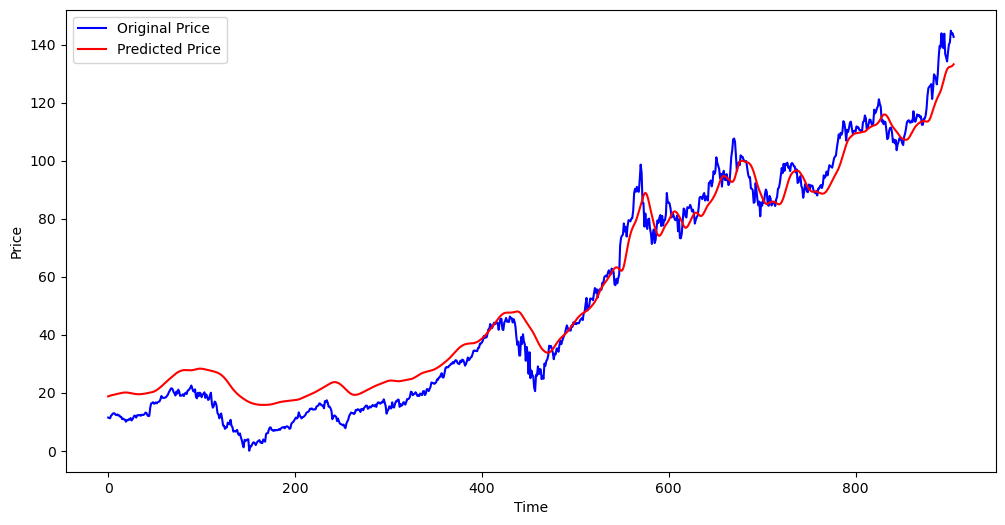

In [146]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()